In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.image as mpimg

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [28]:
# Veri yükleme
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [29]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
train_df.shape

(1460, 81)

In [31]:
test_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,

In [32]:
test_df.shape

(1459, 80)

In [33]:
train_df.columns #tüm stün isimlerini yazdırdık 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Bağımlı değişkenimiz yani 'SalePrice' stününu inceliyoruz

In [35]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Korelasyon tablosu

C:\Users\telha\AppData\Local\Temp\ipykernel_13324\1408917492.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix= train_df.corr() # Korelasyon matrisini hesapladık


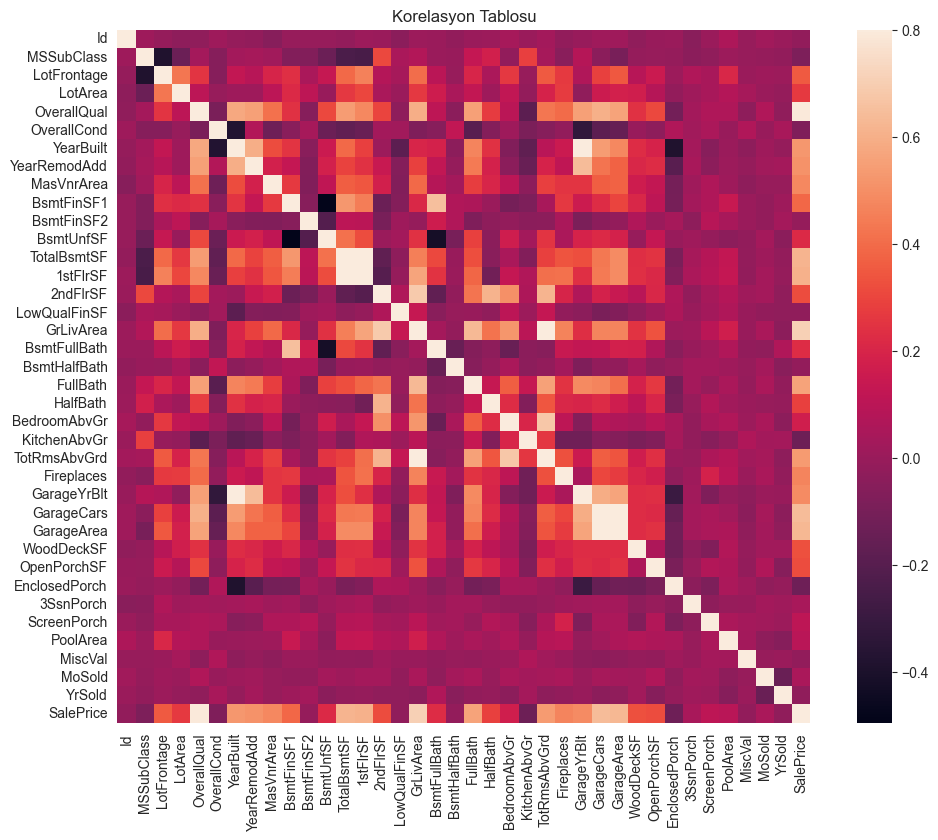

In [36]:
corr_matrix= train_df.corr() # Korelasyon matrisini hesapladık

# Korelasyon matrisini görselleştirdik
plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=.8,square=True)
plt.title('Korelasyon Tablosu')
plt.show()

### Filitreleyerek korelasyon tablosunu yeniden oluşturma (sadece korelasyon değerli 0.50 den yüksek olanlar)

C:\Users\telha\AppData\Local\Temp\ipykernel_13324\1924045350.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


Text(0.5, 1.0, "Korelasyon Tablosu (SalesPrice ile 0.5'in Üzerinde)")

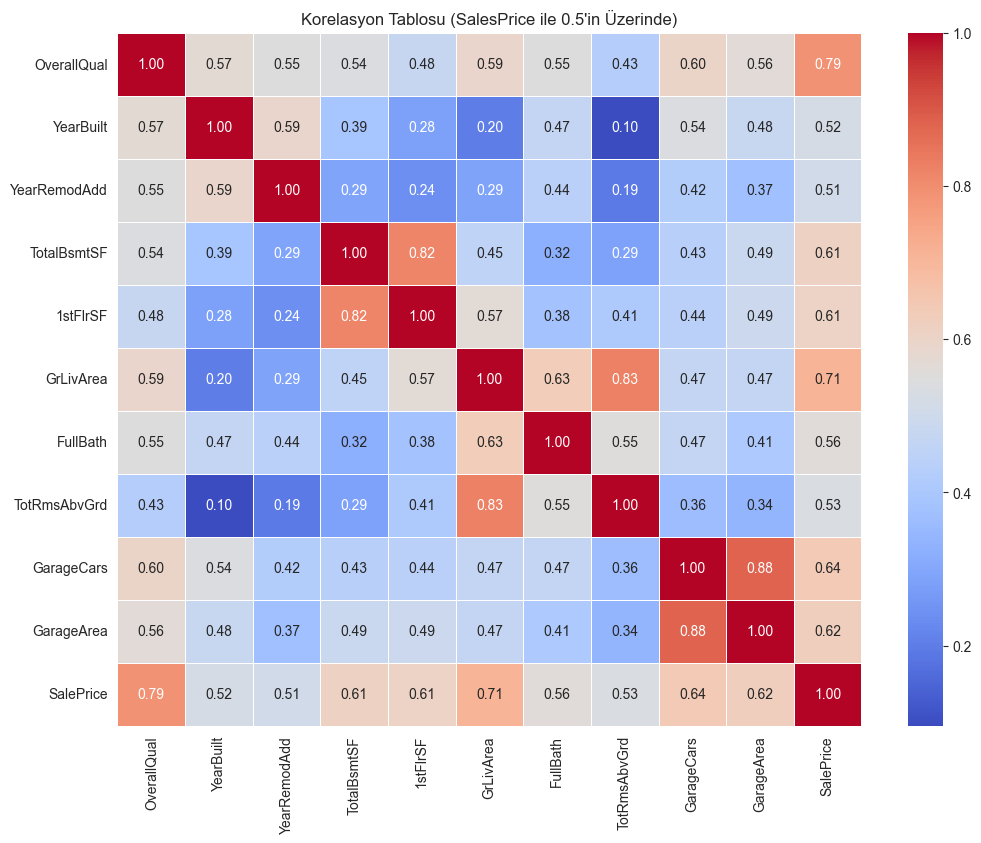

In [37]:
corr_matrix = train_df.corr()
salesprice_corr = corr_matrix['SalePrice']

# 0.5'in üstündeki korelasyon değerlerini filtreledik
high_corr_features = salesprice_corr[abs(salesprice_corr) > 0.5].index

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix.loc[high_corr_features, high_corr_features], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelasyon Tablosu (SalesPrice ile 0.5\'in Üzerinde)')

### OverallQual ve GrLivArea stünları en yüksek korelasyon değerlerine sahip olan stünlardır

In [38]:
#Korelasyon değerlerini en yüksekten en düşüğe doğru sıralayan kod
corr = train_df.corr().drop('SalePrice')
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr.SalePrice

C:\Users\telha\AppData\Local\Temp\ipykernel_13324\647205187.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr().drop('SalePrice')


OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [39]:
# ID sütunu sadece kaggle'da sonucu görmek için gerekli olduğundan iki tablodan da sildik
# Test dosyasındaki idler işimize daha sonra yarayacağı için kaydettik 
test_ids = test_df['Id']
train_ids = train_df['Id']
train_df.drop(['Id'], axis=1, inplace=True)
test_df.drop(['Id'], axis=1, inplace=True)

In [40]:
# Her seferinde ikisi içinde aynı işlemleri iki defa yapmak yerine Eğitim ve test veri setlerini birleştiriyoruz
birlesim_df = pd.concat([train_df, test_df], sort=False)

In [41]:
sns.set_style('darkgrid') # Oluşturacağımız grafiğin arka planını ayarlıyoruz
edgecolor = 'black' #noktaların veya çizgilerin kenar rengini siyah yaptık 
fig = plt.figure(figsize=(12,12)) # Oluşturacağımız grafiğin büyüklüğünü belirliyoruz

# Hep aynı kodları yazmak yerine bir fonksiyon oluşturup aşşağıda bu fonksiyonu çağırıyoruz
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = birlesim_df[a], y = birlesim_df['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle(a + " ve SalePrice arasındaki ilişki")
    plt.show()

<Figure size 1200x1200 with 0 Axes>

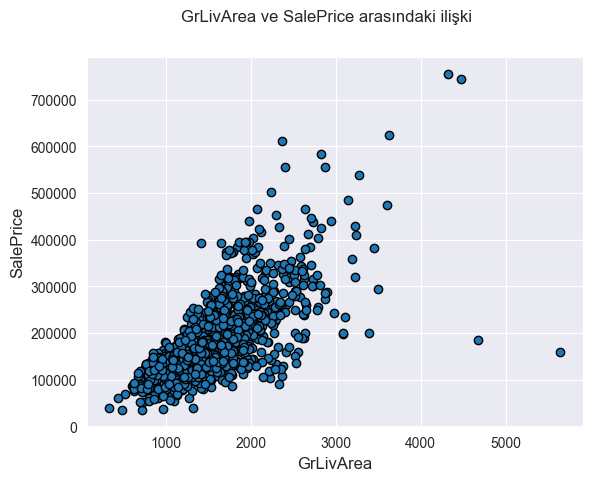

In [42]:
scatter_plot('GrLivArea')

### 4000 den yüksek olan değerleri outlier olarak tespit ettik. Bu değerler yapacağımız prediction işlemini olumsuz etkileyecektir bu yüzden bunların silinmesi lazım.

In [43]:
#birlesim_df = birlesim_df.drop(birlesim_df[(birlesim_df['GrLivArea'] > 4000)].index)

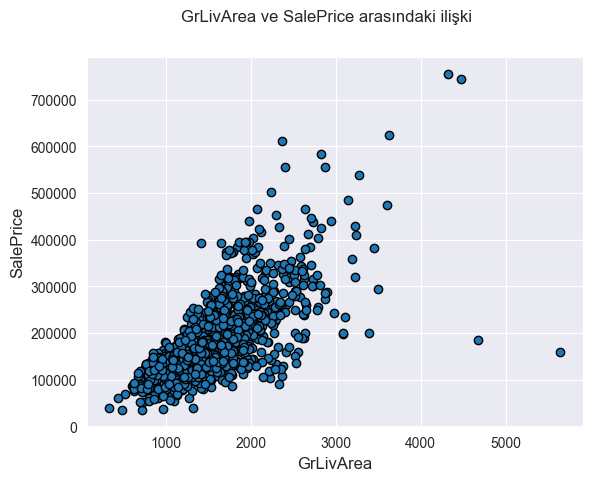

In [44]:
scatter_plot('GrLivArea')

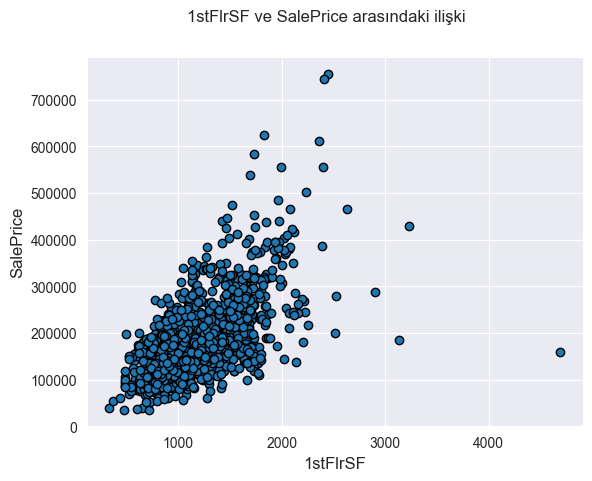

In [45]:
scatter_plot('1stFlrSF')

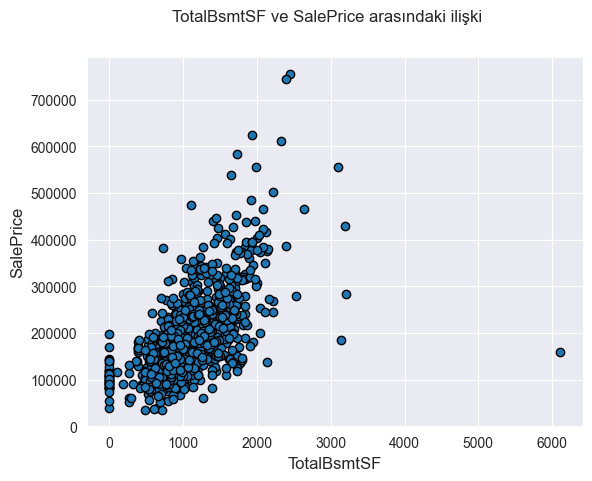

In [46]:
scatter_plot('TotalBsmtSF')

# Bu stünda da 2.500 den fazla değere sahip olan verileri sileceğiz

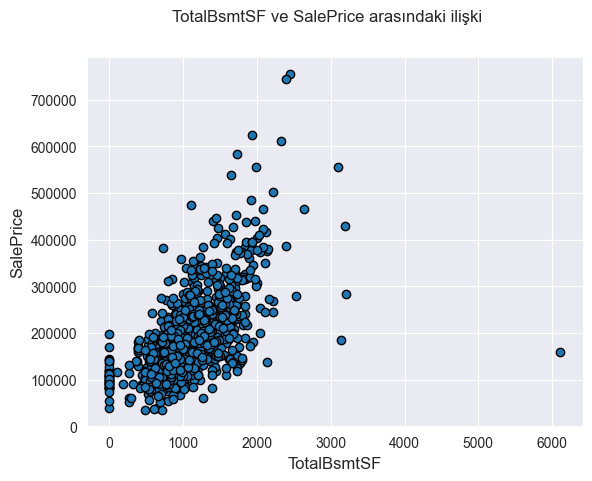

In [47]:
#birlesim_df = birlesim_df.drop(birlesim_df[(birlesim_df['TotalBsmtSF'] > 2500)].index)
scatter_plot('TotalBsmtSF')

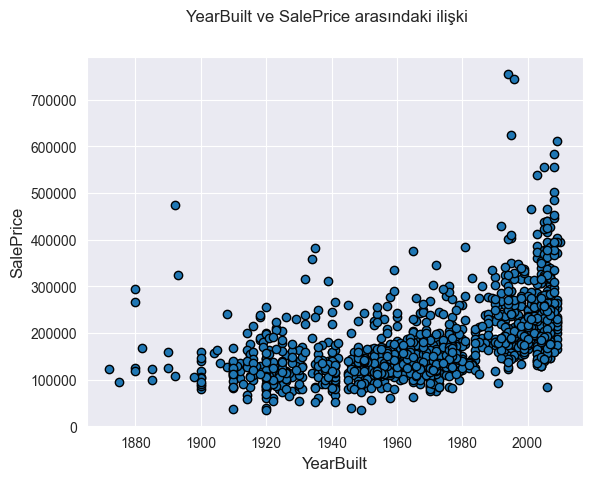

In [48]:
scatter_plot('YearBuilt')

In [49]:
birlesim_df.shape

(2919, 80)

# Boş veriler ile başa çıkma

In [50]:
toplam   = birlesim_df.isnull().sum().sort_values(ascending=False) # Toplam boş veri sayısı, büyükten küçüğe sıralanmış halde
yuzdelik = (birlesim_df.isnull().sum() / birlesim_df.isnull().count()).sort_values(ascending=False)*100  # Eksik verilerin yüzdelik hali
benzersiz_veri_say = birlesim_df.nunique() #Kaç tane benzersiz veri var 
bosveri  = pd.concat([toplam, yuzdelik, benzersiz_veri_say],axis=1,
                         keys=['Toplam boş veri sayısı', 'Boş veri yüzdeliği', 'Benzersiz veri sayısı'], sort=False)
# Oluşturduğumuz veri setlerini 'bosveri' veri setinde birleştiriyoruz stün başlıklarını yazıyoruz
bosveri

,Toplam boş veri sayısı,Boş veri yüzdeliği,Benzersiz veri sayısı
PoolQC,2909,99.657417,3
MiscFeature,2814,96.402878,4
Alley,2721,93.216855,2
Fence,2348,80.438506,4
SalePrice,1459,49.982871,663
FireplaceQu,1420,48.646797,5
LotFrontage,486,16.649538,128
GarageCond,159,5.447071,5
GarageFinish,159,5.447071,3
GarageQual,159,5.447071,5


In [51]:
birlesim_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [52]:
birlesim_df['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [53]:
birlesim_df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933., 1917.,
       1896., 1895., 2207., 1943., 1919.])

### PoolQC, Alley ve MiscFeatur stünları çok fazla boş veri bulundurdukları için silinecek

In [54]:
birlesim_df.drop(['PoolQC', 'Alley', 'MiscFeature'], axis=1, inplace=True)

In [55]:
#boş verileri "Bos" olarak güncelliyoruz
bos_stun_isimleri = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','Fence','FireplaceQu','BsmtQual',
                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
# None değerleri 'Bos' yapıyoruz
birlesim_df[bos_stun_isimleri] = birlesim_df[bos_stun_isimleri].fillna('Bos')

#boş verileri "0" olarak güncelliyoruz
bos_stun_isimleri2 = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath',
                          'BsmtHalfBath','GarageYrBlt', 'GarageArea', 'GarageCars']
birlesim_df[bos_stun_isimleri2] = birlesim_df[bos_stun_isimleri2].fillna('0')

#LotFrontage stünündaki boş verileri median değerine göre dolduruyoruz
birlesim_df["LotFrontage"] = birlesim_df["LotFrontage"].fillna(birlesim_df["LotFrontage"].median())

#Functional stününda %93 "Typ" olduğu için boş verileri de "Typ" yapıyoruz
birlesim_df["Functional"] = birlesim_df["Functional"].fillna("Typ")

#Sadece bir veya birkaç boş veri var en sık tekrar eden ile dolduruyoruz
birlesim_df['Electrical'] = birlesim_df['Electrical'].fillna(birlesim_df['Electrical'].mode()[0])
birlesim_df['KitchenQual'] = birlesim_df['KitchenQual'].fillna(birlesim_df['KitchenQual'].mode()[0])
birlesim_df['SaleType'] = birlesim_df['SaleType'].fillna(birlesim_df['SaleType'].mode()[0])
birlesim_df['Exterior1st'] = birlesim_df['Exterior1st'].fillna(birlesim_df['Exterior1st'].mode()[0])
birlesim_df['Exterior2nd'] = birlesim_df['Exterior2nd'].fillna(birlesim_df['Exterior2nd'].mode()[0])
birlesim_df['MSZoning'] = birlesim_df['MSZoning'].fillna(birlesim_df['MSZoning'].mode()[0])

#Boş verileri stün içersindeki "None" a eşitliyoruz
birlesim_df["MasVnrType"] = birlesim_df["MasVnrType"].fillna("None")
birlesim_df["MasVnrArea"] = birlesim_df["MasVnrArea"].fillna(0)

In [56]:
print(birlesim_df.isnull().sum().sum()) #geri kalan boş verilerde test veri setindeki SalePrice stünündan kaynaklanmakta

1461


### Benzer stünları tek başlık altında toparlamak için fonksiyon

In [57]:
numeric_columns = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']
birlesim_df[numeric_columns] = birlesim_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

birlesim_df['Toplam_M2_1'] = birlesim_df['TotalBsmtSF'] + birlesim_df['1stFlrSF'] + birlesim_df['2ndFlrSF']

birlesim_df['Toplam_Banyo'] = (birlesim_df['FullBath'] + (0.5 * birlesim_df['HalfBath']) + birlesim_df['BsmtFullBath'] 
                             + (0.5 * birlesim_df['BsmtHalfBath']))

birlesim_df['Toplam_Veranda_M2'] = (birlesim_df['OpenPorchSF'] + birlesim_df['3SsnPorch'] + birlesim_df['EnclosedPorch'] + 
                        birlesim_df['ScreenPorch'] + birlesim_df['WoodDeckSF'])

birlesim_df['Toplam_M2_2'] = (birlesim_df['BsmtFinSF1'] + birlesim_df['BsmtFinSF2'] + birlesim_df['1stFlrSF'] + birlesim_df['2ndFlrSF'])
    
birlesim_df['Toplam_Kalite'] = birlesim_df['OverallQual'] + birlesim_df['OverallCond']
    

In [58]:
# kategorik verilerin sayısal değerlere dönüştürülmesi
birlesim_df=pd.get_dummies(birlesim_df)

In [59]:
birlesim_df.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Toplam_M2_1,Toplam_Banyo,Toplam_Veranda_M2,Toplam_M2_2,Toplam_Kalite,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_Bos,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Bos,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Bos,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Bos,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_Bos,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,0.0,0.0,0.0,0,0,0,0,0,0,0,6,2006,NaN,1638.0,1.5,0,1092.0,11,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,NaN,1638.0,1.5,24,1344.0,9,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,NaN,2448.0,2.0,474,2448.0,12,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,0.0,80,32,0,0,0,0,700,7,2006,NaN,1882.0,1.5,112,1307.0,10,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,60,74.0,9627,7,5,1993,1994,94.0,758.0,0.0,238.0,996.0,996,1004,0,2000,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,650.0,190,48,0,0,0,0,0,11,2006,NaN,2996.0,2.5,238,2758.0,12,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [77]:
birlesim_df.tail(1450)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Toplam_M2_1,Toplam_Banyo,Toplam_Veranda_M2,Toplam_M2_2,Toplam_Kalite,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_Bos,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Bos,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Bos,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Bos,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_Bos,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
9,20,70.0,8400,4,5,1970,1970,0.0,804.0,78.0,0.0,882.0,882,0,0,882,1.0,0.0,1,0,2,1,4,0,1970.0,2.0,525.0,240,0,0,0,0,0,0,4,2010,NaN,1764.0,2.0,240,1764.0,9,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
10,120,26.0,5858,7,5,1999,1999,0.0,1051.0,0.0,354.0,1405.0,1337,0,0,1337,1.0,0.0,2,0,2,1,5,1,1999.0,2.0,511.0,203,68,0,0,0,0,0,6,2010,NaN,2742.0,3.0,271,2388.0,12,0,0,1,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
11,160,21.0,1680,6,5,1971,1971,504.0,156.0,0.0,327.0,483.0,483,504,0,987,0.0,0.0,1,1,2,1,5,0,1971.0,1.0,264.0,275,0,0,0,0,0,0,2,2010,NaN,1470.0,1.5,275,1143.0,11,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12,160,21.0,1680,5,5,1971,1971,492.0,300.0,0.0,225.0,525.0,525,567,0,1092,0.0,0.0,1,1,3,1,6,0,1997.0,1.0,320.0,0,0,0,0,0,0,0,3,2010,NaN,1617.0,1.5,0,1392.0,10,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
13,160,24.0,2280,6,6,1975,1975,0.0,514.0,0.0,341.0,855.0,855,601,0,1456,0.0,0.0,2,1,3,1,6,1,1975.0,2.0,440.0,173,0,0,0,0,0,0,6,2010,NaN,2311.0,2.5,173,1970.0,12,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,0.0,0.0,0.0,0,0,0,0,0,0,0,6,2006,NaN,1638.0,1.5,0,1092.0,11,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,NaN,1638.0,1.5,24,1344.0,9,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,NaN,2448.0,2.0,474,2448.0,12,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1457,85,62

In [78]:
train_data=birlesim_df[:1459]
test_data=birlesim_df[1460:]

In [80]:
train_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Toplam_M2_1,Toplam_Banyo,Toplam_Veranda_M2,Toplam_M2_2,Toplam_Kalite,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_Bos,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Bos,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Bos,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Bos,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_Bos,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,2566.0,3.5,61,2416.0,12,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,2524.0,2.5,298,2240.0,14,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,2706.0,3.5,42,2272.0,12,0,0,0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,2473.0,2.0,307,1933.0,12,0,0,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,3343.0,3.5,276,2853.0,13,0,0,0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [82]:
test_data.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Toplam_M2_1,Toplam_Banyo,Toplam_Veranda_M2,Toplam_M2_2,Toplam_Kalite,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_Bos,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Bos,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Bos,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Bos,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_Bos,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,0.0,0.0,0.0,0,0,0,0,0,0,0,6,2006,NaN,1638.0,1.5,0,1092.0,11,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,NaN,1638.0,1.5,24,1344.0,9,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,NaN,2448.0,2.0,474,2448.0,12,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,0.0,80,32,0,0,0,0,700,7,2006,NaN,1882.0,1.5,112,1307.0,10,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,60,74.0,9627,7,5,1993,1994,94.0,758.0,0.0,238.0,996.0,996,1004,0,2000,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,650.0,190,48,0,0,0,0,0,11,2006,NaN,2996.0,2.5,238,2758.0,12,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [83]:
test_data=test_data.drop("SalePrice",axis=1)

In [84]:
bagimlidegisken = train_data['SalePrice']

In [85]:
train_data= train_data.drop('SalePrice', axis=1)

In [86]:
x = train_data
y = bagimlidegisken

In [87]:
g = GradientBoostingRegressor()
r = RandomForestRegressor()

In [88]:
model1=g.fit(x,y)

In [96]:
model2=r.fit(x,y)

In [89]:
tahmin=model1.predict(test_data)

In [97]:
tahmin2=model2.predict(test_data)

In [90]:
deneme = pd.DataFrame(tahmin, columns=['SalePrice'])

In [103]:
deneme2=pd.DataFrame(tahmin2,columns=['SalePrice'])

In [104]:
deneme['Id'] = test_ids

In [105]:
deneme2['Id'] = test_ids

In [106]:
deneme

,Id,SalePrice
0,1461,125470.013970
1,1462,170872.836672
2,1463,179242.863008
3,1464,191076.024333
4,1465,185955.080490
...,...,...
1454,2915,90027.109666
1455,2916,88667.132493
1456,2917,151810.746027
1457,2918,116637.412729


In [107]:
deneme2

,SalePrice,Id
0,131790.16,1461
1,164436.50,1462
2,175305.02,1463
3,186568.86,1464
4,201209.47,1465
...,...,...
1454,88833.00,2915
1455,90032.50,2916
1456,162534.87,2917
1457,113574.88,2918


In [108]:
deneme=deneme[['Id','SalePrice']]

In [109]:
deneme2=deneme2[['Id','SalePrice']]

In [110]:
deneme.to_csv('deneme_sonuc.csv',index=False)

In [111]:
deneme2.to_csv('deneme_sonuc2.csv',index=False)

In [95]:
print(test_data.shape)


(1459, 295)


## En iyi skoru GradientBoostingRegressor() ile aldık 

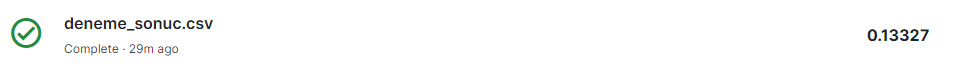

In [129]:
from IPython.display import Image
image_path = 'sonuc.png'
display(Image(filename=image_path))